In [ ]:
import torch.utils.data as data
from torchvision import datasets, models, transforms
IN_SIZE = 224
import pickle
from PIL import Image
import matplotlib.pyplot as plt
import os
import os.path
import sys
import numpy as np
import torch

def make_dataset(list_file):
    images = []
    labels = []
    
    with open(list_file,'r') as F:
        lines = F.readlines()
    
    for line in lines:
        image = line.rstrip()
        images.append(image)
        label = image.replace('images/frame','labels/label_frame')
        labels.append(label)
    
    return images, labels

class DatasetFolder_FileList(data.Dataset):
    def __init__(self, file_list, attributes_dict, transform):
        samples,targets  = make_dataset(file_list)

        if len(samples) == 0:
            raise(RuntimeError("Found 0 samples"))

        self.root = file_list
        self.loader = loader
        extensions = []
        self.extensions = extensions

        self.samples = samples
        self.targets = targets

        self.transform = transform
        
        with open(attributes_dict, 'rb') as F:
            attributes = pickle.load(F)
        
        self.attributes = attributes


    def __getitem__(self, index):

        """
        Args:
            index (int): Index

        Returns:
            tuple: (sample, target) where target is class_index of the target class.
        """

        impath = self.samples[index]
        label_path = impath.replace('images/frame','labels/label_frame')


        sample = Image.open(impath)        
        sample_label = self.attributes[impath]
        floated_labels = []
        for s in sample_label:
            floated_labels.append(float(s))
        print(sample_label)
        
        if self.transform is not None:
            print('transforming')
            transformed_sample = self.transform(sample)
#         if self.target_transform is not None:
#             sample_label = self.target_transform(sample_label)
        
        transformed_labels = torch.LongTensor(floated_labels)

        return transformed_sample, transformed_labels, impath

    def __len__(self):
        return len(self.samples)

    def __repr__(self):
        fmt_str = 'Dataset ' + self.__class__.__name__ + '\n'

        fmt_str += '    Number of datapoints: {}\n'.format(self.__len__())
        fmt_str += '    Root Location: {}\n'.format(self.root)
        tmp = '    Transforms (if any): '
        fmt_str += '{0}{1}\n'.format(tmp, self.transform.__repr__().replace('\n', '\n' + ' ' * len(tmp)))
        tmp = '    Target Transforms (if any): '
        fmt_str += '{0}{1}'.format(tmp, self.target_transform.__repr__().replace('\n', '\n' + ' ' * len(tmp)))
        return fmt_str

In [161]:
loader = DatasetFolder_FileList

In [162]:
transform = transforms.Compose([
    # you can add other transformations in this list
    transforms.ToTensor()
])

In [163]:
########################################### LOADER SECTION ###########################################

# get_loader abstracts out the loader from the train file. Look into
# loader = get_loader(LOADER_TYPE)
data_transforms = {
    'train': transforms.Compose([
        transforms.Resize(IN_SIZE),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    'val': transforms.Compose([
        transforms.Resize(IN_SIZE),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
   ])
}

label_transforms = {
    'train': transforms.Compose([
        transforms.Resize(IN_SIZE),
        transforms.ToTensor()
    ]),
    'val': transforms.Compose([
        transforms.Resize(IN_SIZE),
        transforms.ToTensor()
   ])
}

In [164]:
transform_3 = transforms.Compose([ transforms.ToTensor(),
                                    transforms.Normalize(mean = [0.485,0.456,0.406],
                                                     std = [0.229, 0.224, 0.225 ])
                               ])

transform_2 = transforms.Compose([ transforms.Normalize(mean = [0,0,0],
                                                     std = [ 1/0.229, 1/0.224, 1/0.225 ]),
                                   transforms.Normalize(mean = [-0.485,-0.456,-0.406],
                                                     std = [1,1,1]),
                               ])

In [165]:
train_file_list = '/data/graphics/toyota-pytorch/biased_dataset_generalization/dataset_lists/train_list.txt'
test_file_list = '/data/graphics/toyota-pytorch/biased_dataset_generalization/dataset_lists/test_list.txt'
att_path = '/data/graphics/toyota-pytorch/biased_dataset_generalization/dataset_lists/merged_colors_binned_attribute.p'

In [166]:
transform_1 = transforms.Compose([ transforms.ToTensor(),
                                    transforms.Normalize(mean = [0.485,0.456,0.406],
                                                     std = [ 0.229, 0.224, 0.225 ]),
                               ])

In [167]:
dset_train = loader(train_file_list, att_path, transform_3)
dset_val = loader(test_file_list, att_path,  transform_3)

In [168]:
# dset_train

In [169]:
BATCH_SIZE = 6

In [170]:
train_loader = torch.utils.data.DataLoader(dset_train, batch_size=BATCH_SIZE, shuffle=True, num_workers=0,drop_last=True)
val_loader = torch.utils.data.DataLoader(dset_val, batch_size=BATCH_SIZE, shuffle=False, num_workers=0,drop_last=True)

dset_loaders = {'train':train_loader,'val':val_loader}
dset_sizes = {}
dset_sizes['train'] = len(dset_train)
dset_sizes['val'] = len(dset_val)

In [171]:
for d in dset_loaders['train']:
    im,lab,paths = d
    break

[4, 2, 3, 14]
transforming
[2, 1, 0, 12]
transforming
[4, 4, 2, 17]
transforming
[2, 3, 0, 17]
transforming
[0, 1, 3, 7]
transforming
[0, 3, 0, 0]
transforming


In [172]:
lab

tensor([[ 4,  2,  3, 14],
        [ 2,  1,  0, 12],
        [ 4,  4,  2, 17],
        [ 2,  3,  0, 17],
        [ 0,  1,  3,  7],
        [ 0,  3,  0,  0]])

In [173]:
type(lab)

torch.Tensor

In [174]:
lab[0]

tensor([ 4,  2,  3, 14])

In [175]:
a = (torch.rand(4),torch.rand(4))

In [176]:
torch.rand(4)

tensor([0.4711, 0.3983, 0.3974, 0.0129])

In [177]:
lab[0]

tensor([ 4,  2,  3, 14])

In [178]:
a = (*lab)

SyntaxError: can't use starred expression here (<ipython-input-178-945c2f8fecbd>, line 4)

In [186]:
lab.shape

torch.Size([6, 4])

In [189]:
lab[1]

tensor([ 2,  1,  0, 12])

In [180]:
torch.stack(lab)

TypeError: stack(): argument 'tensors' (position 1) must be tuple of Tensors, not Tensor

In [190]:
lab

tensor([[ 4,  2,  3, 14],
        [ 2,  1,  0, 12],
        [ 4,  4,  2, 17],
        [ 2,  3,  0, 17],
        [ 0,  1,  3,  7],
        [ 0,  3,  0,  0]])

In [192]:
scales = lab[:,0]

In [196]:
scales,angles = lab[:]

ValueError: too many values to unpack (expected 2)

In [195]:
scales

tensor([4, 2, 4, 2, 0, 0])

In [193]:
scales

tensor([4, 2, 4, 2, 0, 0])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


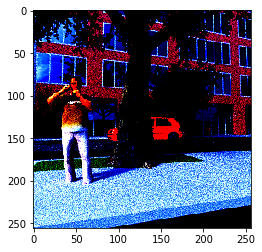

In [77]:
plt.imshow(im[2].permute(1,2,0))

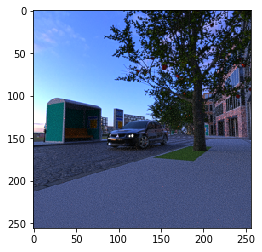

In [62]:
plt.imshow(transform_2(im[2]).permute(1,2,0))

In [235]:
invTrans = transforms.Compose([ transforms.Normalize(mean = [ 0., 0., 0. ],
                                                     std = [ 1/0.229, 1/0.224, 1/0.225 ]),
                                transforms.Normalize(mean = [ -0.485, -0.456, -0.406 ],
                                                     std = [ 1., 1., 1. ]),
                               ])

In [210]:
def convert_input(inp, title=None):
    '''
    The data loader loads image as tensor and already has transformed the image (normalization). This undoes the normalization and clips at 0,1. Then returns input.
    '''
    inp = inp..numpy().transpose((1, 2, 0))
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    inp = std * inp + 1.4 * mean
    inp = inp * 255
    return inp

In [236]:
inv_tensor = invTrans(im[0])

In [238]:
inv_tensor.shape

torch.Size([3, 256, 256])

In [211]:
import matplotlib.pyplot as plt

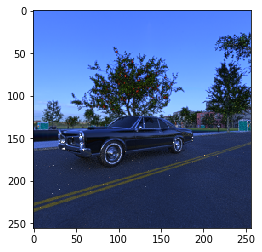

In [317]:
plt.imshow(im[0].permute(1,2,0))

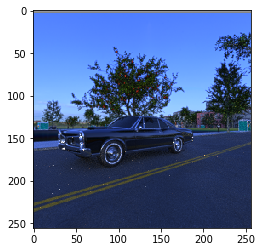

In [323]:
plt.imshow(transform_2(im[0].permute(1,2,0)))

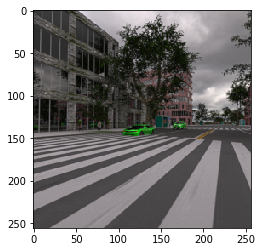

In [287]:
plt.imshow(im[3].permute(1,2,0))

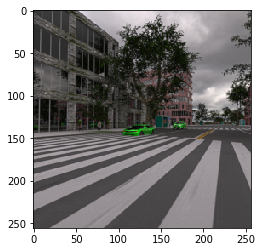

In [290]:
plt.imshow(Image.open(paths[3]))